In [92]:
import pandas as pd
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
from acquire import get_iris_data,get_telco_data,get_titantic_data
from env import get_db_url
from prepare import train_validate_test_split
from scipy import stats

## 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
df_iris = data('iris')

print the first 3 rows

In [ ]:
df_iris.head(3)

print the number of rows and columns (shape)

In [ ]:
df_iris.shape

print the column names

In [ ]:
df_iris.columns

print the data type of each column

In [ ]:
df_iris.dtypes

print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
df_iris.describe()

In [ ]:
# Scaling does not seem to be required as all data is in cm

## 5. Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1kihBDi60lQX47cLTxNbLjnOnil0kLu922K7i5LM9hxE/edit#gid=1023018493'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google_sheets= pd.read_csv(csv_export_url)

assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_google_sheets_sample = df_google_sheets.head(100)

print the number of rows of your original dataframe

In [ ]:
df_google_sheets.shape[0]

print the first 5 column names

In [ ]:
df_google_sheets.columns[:5]

print the column names that have a data type of object

In [ ]:
df_google_sheets.select_dtypes(include = 'object').columns

compute the range for each of the numeric variables.

In [ ]:
df_google_sheets.select_dtypes(include = 'number').max()-df_google_sheets.select_dtypes(include = 'number').min()

## 6. Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.


In [ ]:
df_excel = pd.read_excel('innis_spreadsheet_exercises_marder.xlsx')

assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

print the first 5 column names

In [ ]:
df_excel.columns[:5]

print the column names that have a data type of object

In [ ]:
df_excel.select_dtypes('object').columns

compute the range for each of the numeric variables.

In [ ]:
df_excel.select_dtypes(include = 'number').max()-df_excel.select_dtypes(include = 'number').min()

## 7. Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

print the first 3 rows

In [ ]:
df_google.head(3)

print the number of rows and columns

In [ ]:
df_google.shape

print the column names

In [ ]:
df_google.columns

print the data type of each column

In [ ]:
df_google.dtypes

print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe()

print the unique values for each of your categorical variables

In [ ]:
for col in df_google[df_google.columns[df_google.nunique()<10]]:
    print(col,': ',df_google[col].unique())

# Data Preparation Exercises

In [ ]:
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

### Prepare Iris Data

In [ ]:
iris = get_iris_data()

In [ ]:
iris.head()

In [ ]:
iris = iris.drop(columns=['species_id','measurement_id'])

In [ ]:
dummy_df = pd.get_dummies(iris[['species_name']], dummy_na=False, drop_first=[True])

In [ ]:
iris = pd.concat([iris, dummy_df], axis = 1)
iris.head()

In [ ]:
def prep_iris(iris):
    iris = iris.drop(columns=['species_id','measurement_id'])
    iris = iris.rename(columns={'species_name':'species'})
    dummy_df = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=[True])
    iris = pd.concat([iris, dummy_df], axis = 1)
    iris = iris.drop(columns=['species'])

    return iris

In [ ]:
iris = prep_iris(get_iris_data())

In [ ]:
iris.head()

## Use Titantic dataset

In [ ]:
df = get_titantic_data()

In [ ]:
df = df.drop(columns=['passenger_id','embarked','deck','class','age'])

In [ ]:
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=True)
df = pd.concat([df,dummy_df], axis = 1)

In [ ]:
train, test = train_test_split(df,test_size=0.2,random_state=123, stratify=df.survived)

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train, validate = train_test_split(train, test_size=0.3, random_state=123, stratify=train.survived)

In [ ]:
validate.shape

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

In [ ]:
imputer = imputer.fit(train[['embark_town']])
imputer.statistics_

In [ ]:
train[['embark_town']] = imputer.transform(train[['embark_town']])
test[['embark_town']] = imputer.transform(test[['embark_town']])
validate[['embark_town']] = imputer.transform(validate[['embark_town']])

In [ ]:
validate.embark_town.value_counts(dropna=False)

In [ ]:
def prep_titantic(df):
    df = df.drop(columns=['passenger_id','embarked','deck','class','age'])
    df.embark_town = df.embark_town.fillna('Southampton')
    dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=True)
    df = pd.concat([df,dummy_df], axis = 1)
    
    return df.drop(columns=['sex','embark_town'])

In [ ]:
prep_titantic(get_titantic_data())

## Use Telco Dataset

In [ ]:
df = get_telco_data()

In [ ]:
df = df.replace(" ",np.nan)

In [ ]:
df.shape

In [ ]:
df = df.dropna()
df.shape

In [ ]:
df.columns

In [ ]:
df.total_charges = df.total_charges.astype('float64')

In [ ]:
df = df.drop(columns=['payment_type_id','internet_service_type_id','contract_type_id'])

In [ ]:
catcol = df.columns[(df.nunique()<5)&(df.dtypes == 'object')]

In [ ]:
dummy_df = pd.get_dummies(df[catcol], dummy_na=False, drop_first=True)

In [ ]:
df = pd.concat([df,dummy_df],axis=1)

In [ ]:
df.shape

In [ ]:
df = df.drop(columns=catcol)

In [ ]:
df.shape

In [ ]:
def prep_telco(df):
    # replace whitespace only cells with nan
    df = df.replace(" ",np.nan)
    # Drop the rows with NAs 
    df = df.dropna()
    # Change total_charges type to float
    df.total_charges = df.total_charges.astype('float64')
    # Drop unnecessary foreign key ids
    df = df.drop(columns=['payment_type_id','internet_service_type_id','contract_type_id'])
    # Determine the categorical variables - here defined as object data type (non-numeric) and with fewer than 5 values
    catcol = df.columns[(df.nunique()<5)&(df.dtypes == 'object')]
    # Encode categoricals
    dummy_df = pd.get_dummies(df[catcol], dummy_na=False, drop_first=True)
    # Concatenate dummy df to original df
    df = pd.concat([df,dummy_df],axis=1)
    # Remove the original categorical columns after encoding
    df = df.drop(columns=catcol)
    
    return df

In [ ]:
prep_telco(get_telco_data())

## Exploratory Analysis

## Exercises

Continue in your `classification_exercises.ipynb` notebook. Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.

In [9]:
from prepare import prep_iris

In [78]:
iris = get_iris_data()

Using cached data


In [79]:
train, validate, test = train_validate_test_split(iris, target = 'species_name')

In [80]:
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

In [81]:
train = train.drop(columns=['measurement_id','species_id'])
train = train.rename(columns={'species_name':'species'})

In [82]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


### 2. Univariate stats:
    - for quantitiative variables: histogram, boxplot, and compute descriptive statistics

In [83]:
numerics = train.columns[train.dtypes=='float64']

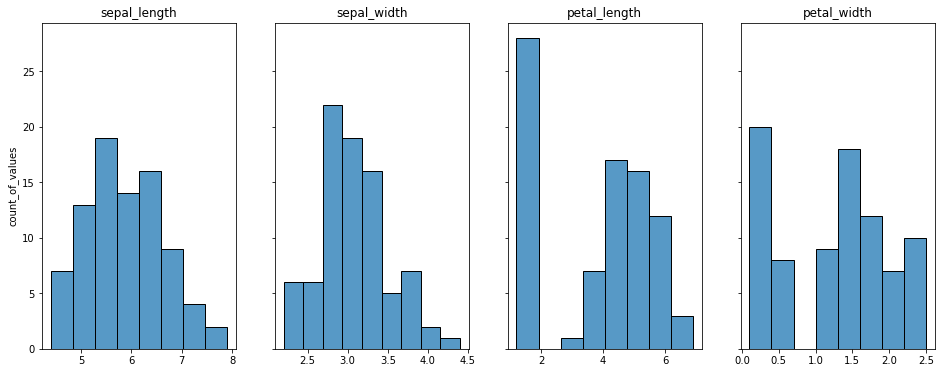

In [84]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i,col in enumerate(numerics):
    sns.histplot(x=col, data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('count_of_values')
    ax[i].set_title(col)


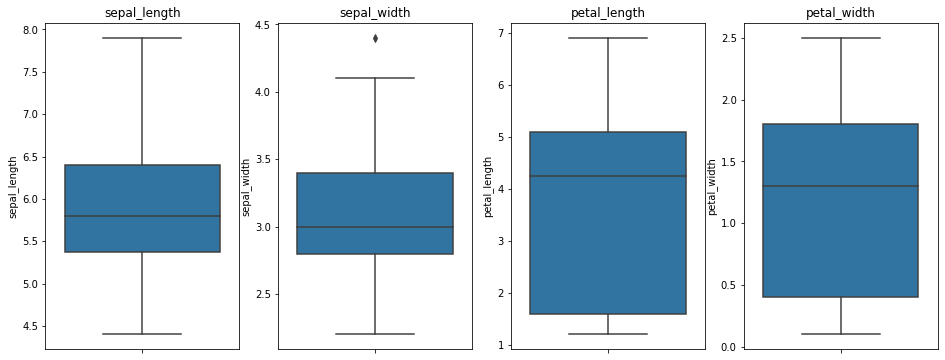

In [85]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))
for i,col in enumerate(numerics):
    sns.boxplot(y=col, data=train, ax=ax[i])
    ax[i].set_title(col)

In [86]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For each species (categorical variable): create a frequency table and a bar plot of those frequencies

Text(0.5, 1.0, 'Species frequency')

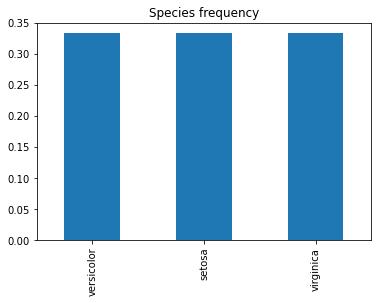

In [87]:
train.species.value_counts(normalize=True).plot.bar()
plt.title('Species frequency')

### Takeaways:
    - Species are evenly distributed in the data set
    - Sepal length and width are fairly normally distributed, petal length and width are not so normal. Petal length is particularly skewed to lower values. 
    - Minimal outliers for the most part - only one is a high value for sepal width

## Bivariate stats

### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

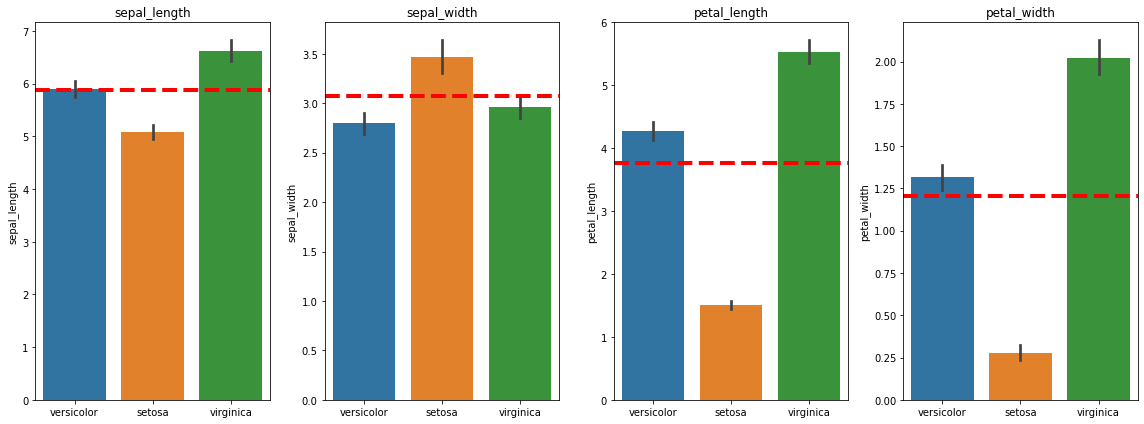

In [88]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=False)
for i,col in enumerate(numerics):
    average_value = train[col].mean()
    sns.barplot(x='species', y=col, data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].axhline(y=average_value,linewidth=4, color='red', ls='--')
    # ax[i].set_ylabel('count_of_values')
    ax[i].set_title(col)
    plt.tight_layout()

In [89]:
train.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.089286    5.896429   6.625000
             std     0.360390    0.425556   0.532378
             min     4.400000    4.900000   5.800000
             25%     4.875000    5.600000   6.300000
             50%     5.000000    5.800000   6.450000
             75%     5.400000    6.125000   6.900000
             max     5.800000    6.900000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.467857    2.796429   2.960714
             std     0.427788    0.280848   0.318956
             min     2.300000    2.300000   2.200000
             25%     3.275000    2.600000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.800000    3.000000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.507143    4.271429   5.535714
             std     0.184448    0.409930   0.496815
             min     1.200000    3.300000   4.800000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.250000   5.500000
             75%     1.600000    4.525000   5.800000
             max     1.900000    5.100000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.275000    1.314286   2.021429
             std     0.120570    0.199470   0.293582
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.400000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [101]:
a = 0.05
print('Comparing virginica and versicolor:')
for measurement_type in numerics:
    print(f'{measurement_type}:')
    u, p = stats.mannwhitneyu(train[measurement_type][train.species=='virginica'],train[measurement_type][train.species=='versicolor'])
    print("\tIs there a significant difference (p<alpha):", p<a)

Comparing virginica and versicolor:
sepal_length:
	Is there a significant difference (p<alpha): True
sepal_width:
	Is there a significant difference (p<alpha): False
petal_length:
	Is there a significant difference (p<alpha): True
petal_width:
	Is there a significant difference (p<alpha): True


### Significant differences between virginica and versicolor for sepal length, petal length, and petal width
### No significant differences between these species for sepal width
### Actions: compare with 3rd species

## Multivariate stats

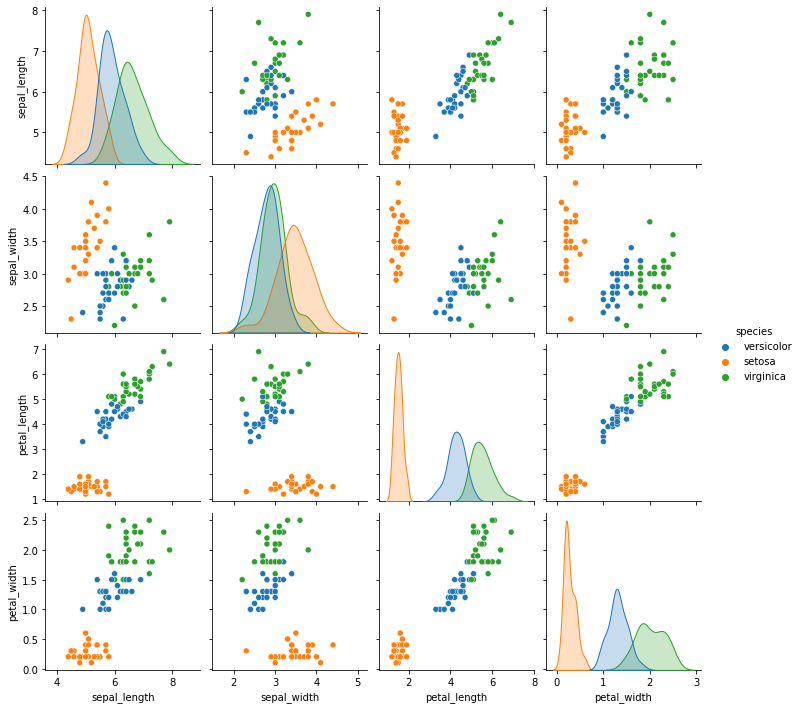

In [104]:
sns.pairplot(data = train, hue = 'species')

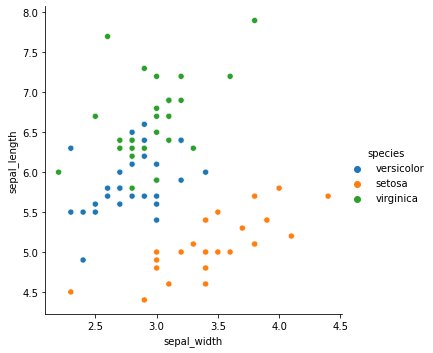

In [105]:
sns.relplot(data = train, x = 'sepal_width', y = 'sepal_length', hue='species')

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

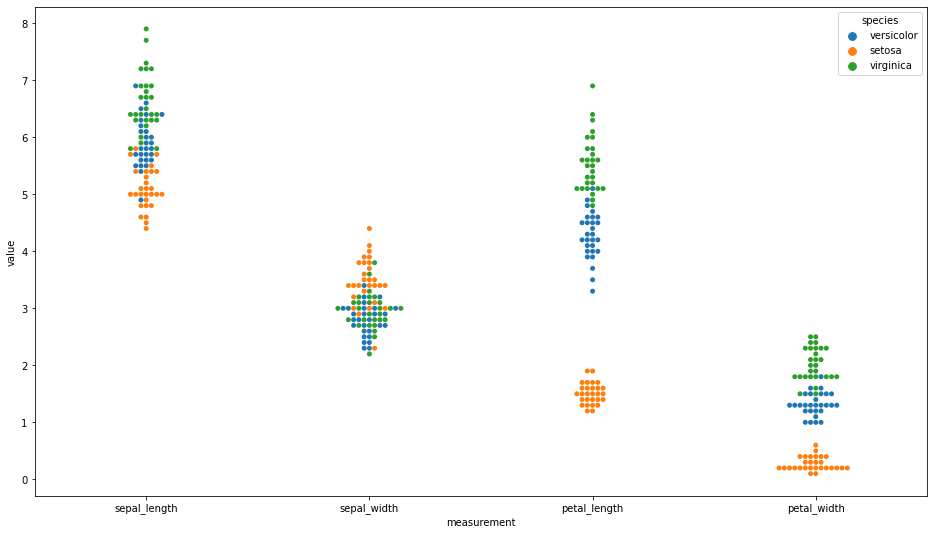

In [113]:
melt = train.melt(id_vars='species', var_name='measurement')
plt.figure(figsize=(16,9))
p=sns.swarmplot(x='measurement',y='value',hue='species', data = melt)
# p.set(yscale='log')

### Takeaways: 
    - spread for petal length and petal width between species is very apparent. Less so for sepal length but still present.
    - sepal width: values are tightly clustered for all 3 species 
    - petal width for all 3 species is not widely distributed

   


3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length
    
    What are your takeaways?

4. Create a heatmap of each variable layering correlation coefficient on top.

5. Create a scatter matrix visualizing the interaction of each variable.

6. Is the sepal length significantly different in virginica compared to versicolor? Run
   a statistical experiment to test this.

    Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
    
    What is your takeaway from this statistical testing?
    
7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.